# Week 7 Lab

In [1]:
%pylab inline

from sympy import *
init_printing(use_unicode = True, fontsize = 16)

pi2 = pi * 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)
 
from waves.tools.dsp import * 
from waves.tools.dsp.interpolator import *

## 5.1.b

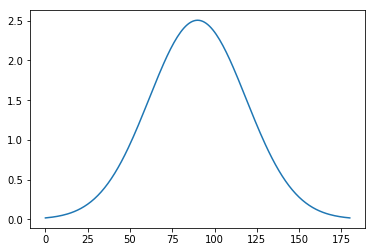

In [3]:
t = np.linspace(0, 100, 100)
w = dsp.get_freq_bins()
alpha = 1.0

X = alpha * np.sqrt(PI2) * np.exp(-alpha**2/2*w**2)

plt.plot(X);

alpha * np.sqrt(PI2)

#### 鐘形曲線的 IDTFT 也是鐘形曲線

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


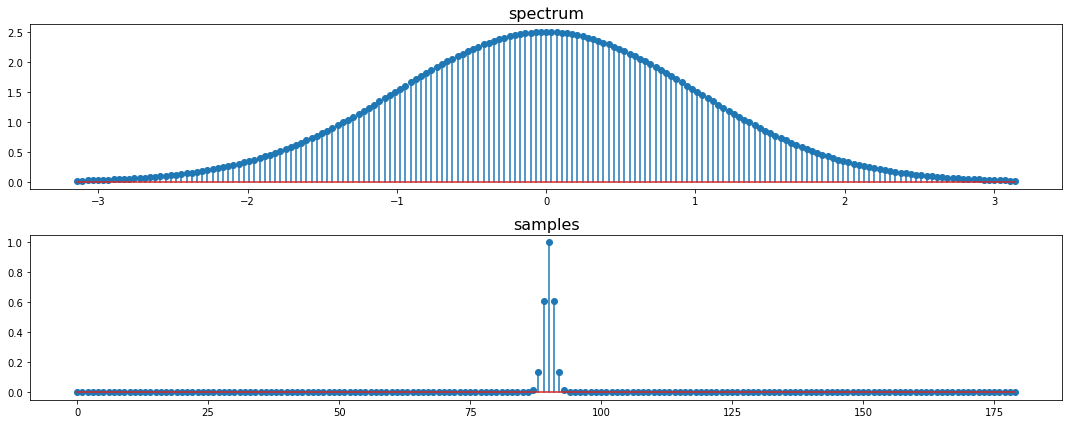

In [4]:
x = fourier.idtft(X, flip_samples=True)

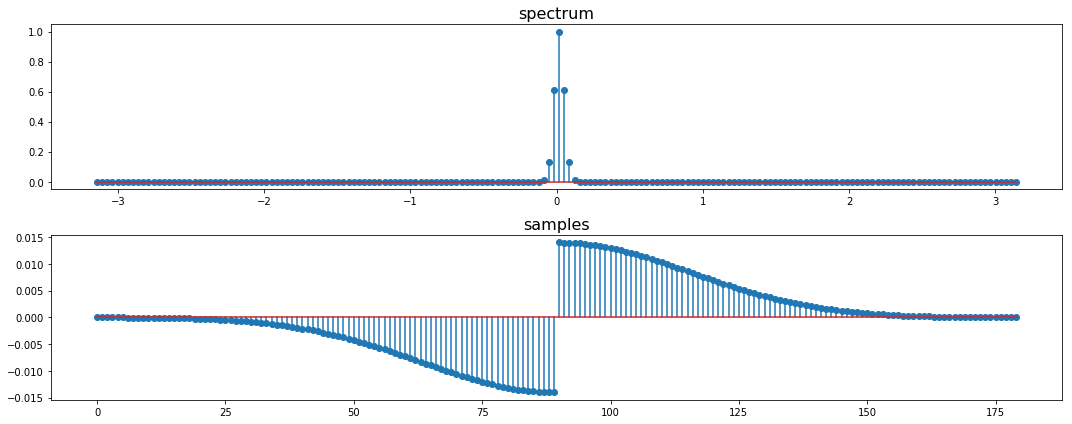

In [5]:
x1 = fourier.idtft(x, flip_samples=True)

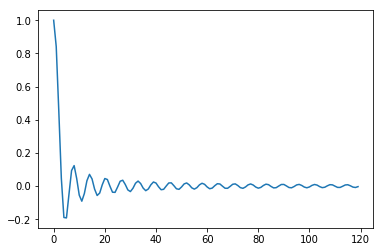

In [6]:
n = np.arange(120) 
s = np.sinc(n/np.pi)
plt.plot(s);

## 5.2.a Interpolation

### Lagrange interpolation
$$ 
\begin{align}
L_n^{(N)}(t) &= \prod_{k = -N; k \neq n}^{N} \frac{t-k}{n-k}  \hspace{2cm} ; n = -N,...,N  \\
p(t) &= \sum_{n= -N}^{N} x[n]L_n^{(N)}(t)  \\
\end{align}
$$

In [7]:
N = [-3, -1, 0, 1, 2]
Y = [1, 2, 1, 3, -2]
# Y = [-3.4, 5.9, 1.4, 8.8, 2.6]

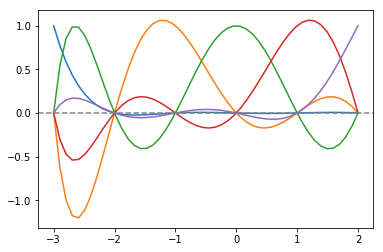

In [8]:
b = Lagrange()
b.plot_basis(N)

### $L_n^{(N)}(t)$ 只有在 t = n 的時候 y 值才會等於 1，t 是整數且 t <> n 的時候，y皆 == 0，所以對 x = 2 的點來說，只有與 $L_2^{(N)}$ 的乘積才會不等於 0

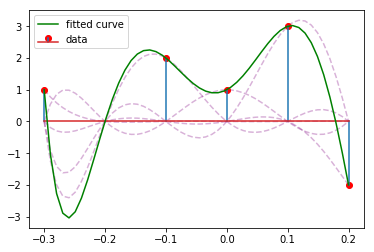

In [9]:
si = Lagrange(fs = 10, steps_between_samples = 10)
_ = si.poly_fit(Y, N, plot = True)

### 當 N 很大的時候 Lagrange poly 趨近於 Sinc

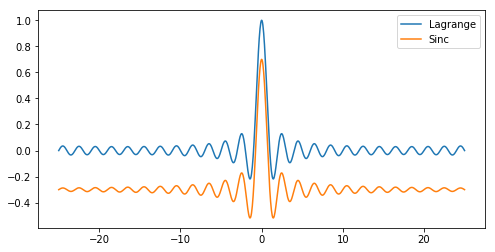

In [10]:
plt.figure(figsize = (8, 4))
b100 = Lagrange()
n = 25
N_size = 600
t = np.linspace(-n, n, 1001)
plt.plot(t, b100.get_base(range(-N_size, N_size), 0)(t), label = 'Lagrange')
plt.plot(t, np.sinc(t-0) - 0.3, label = 'Sinc')
plt.legend()
plt.show()

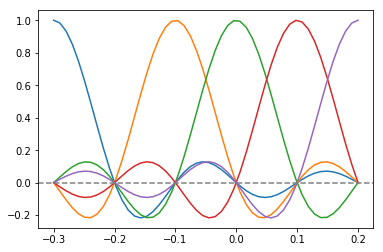

In [11]:
si = Sinc_interpolator(fs = 10, steps_between_samples = 10)
si.plot_basis(N)

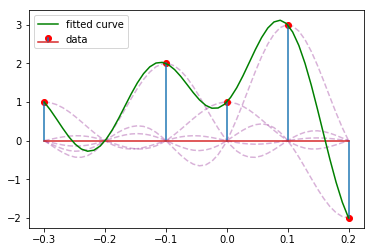

In [12]:
_ = si.poly_fit(Y, N, plot = True)

### Symbolic, 使用 SymPy

In [13]:
N = [-3, -1, 0, 1, 2]
Y = [1, 2, 1, 3, -2]
# Y = [-3.4, 5.9, 1.4, 8.8, 2.6]

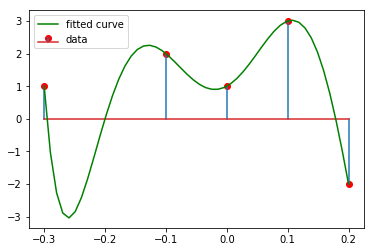

In [14]:
si = Lagrange_symbolic(fs = 10, steps_between_samples = 10)
poly = si.poly_fit(Y, N, plot = True)
poly

### 其實上例中 x,y 是 spectrum， x 類比於頻率, y 類比於 amplitude，而 Lagrange 的 polynormial basis 代表的 類比於 IDTFT 中的 $e^{j\omega n}$，是一個 wave 。

### 也可以說，把 $x[n]*L_n^{(N)}(t)$ 代表的是把 $ g(t) = [x[-N,...0,...N]]$ 與 Lagrange 的 polynormial basis 做內積投射到 basis 之上比便求出 amplitude，而在 "頻率"(x) 等於 2的時候，與   $L_2^{(N)}$ 才能有非零的內積，所以 y 就代表 amplitude。

### polynormial basis 代表的 類比於 IDTFT 中的 $e^{j\omega n}$，是一個 wave  

In [15]:
poly.all_coeffs()

In [16]:
poly(2)

## 5.2.b Local Interpolatio